# Travail pratique d'apprentissage automatique sur les arbres de décisions

## réalisé par ***Mulapi Tita Ketsia***

# 1. Préparation de l’environnement

In [1]:
!pip install graphviz

In [2]:
!pip install pydotplus

In [3]:
from sklearn.datasets import load_iris
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# 2. Construire et visualiser un arbre de décision

On récupère le jeu de données des iris pour comprendre les arbres de décisions, il s'agit d'un jeu de données célèbre qui comporte la longueur et la largeur des sépales et des pétales en cm, de 150 fleurs d'iris de trois espèces différentes qui sont : Setosa, Versicolor et Virginica.

L'objevctif de ce TP est simple : développer un programme capable de
reconnaitre une espèce parmi plusieurs de la famille des Iris. L’algorithme utilisera alors les 4 features pour effectuer son calcul :

    • 𝒙𝟏 : La longueur du pétale
    • 𝒙𝟐 : La largeur du pétale
    • 𝒙𝟑 : La longueur du sépale
    • 𝒙𝟒 : La largeur du sépale

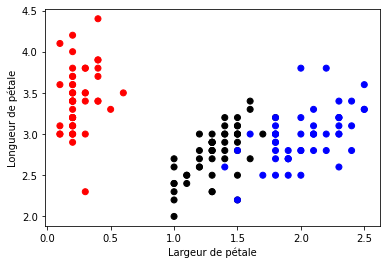

In [4]:
iris = load_iris()
X = iris.data # Les features
y = iris.target # Les targets
colormap=np.array(['Red','black','blue'])
plt.scatter(X[:,3], X[:,1], c = colormap[y])
plt.xlabel("Largeur de pétale")
plt.ylabel("Longueur de pétale")
plt.show()

## 2.1. L'algorithme Decision Tree

> On commence d'abord par appliquer une politique 70-30 pour générer les données d'apprentissages (ou d'entrainement) et, les donnes de tests (ou de décision) avec la fonction **train_test_split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

> Utilisez la fonction **DecisionTreeClassifier** pour construire un arbre de décision sur cette base. Vous utiliserez les paramètres par défaut de l’algorithme.

In [6]:
# création du modèle
modelTree = tree.DecisionTreeClassifier()

# entraînement du modèle
modelTree.fit(X_train,y_train)

DecisionTreeClassifier()

###  récupération des entêtes

In [7]:
classes = iris.target_names
features = iris.feature_names

In [8]:
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### visualisation

> Pour visualiser le résultat de cet apprentissage, vous pouvez exporter la structure de
l’arbre obtenu au format DOT de Graphviz:

- Utilisez la fonction export_graphviz pour exporter la structure de l’arbre dans
un fichier .dot.
- Chargez le contenu du fichier obtenu dans un visualiseur en ligne.
- Si vous avez installé les packages python pour Graphviz, vous pouvez visualiser
et/ou exporter directement le graphe dans le script python

## Executez cette cellule pour visualiser le graphe.

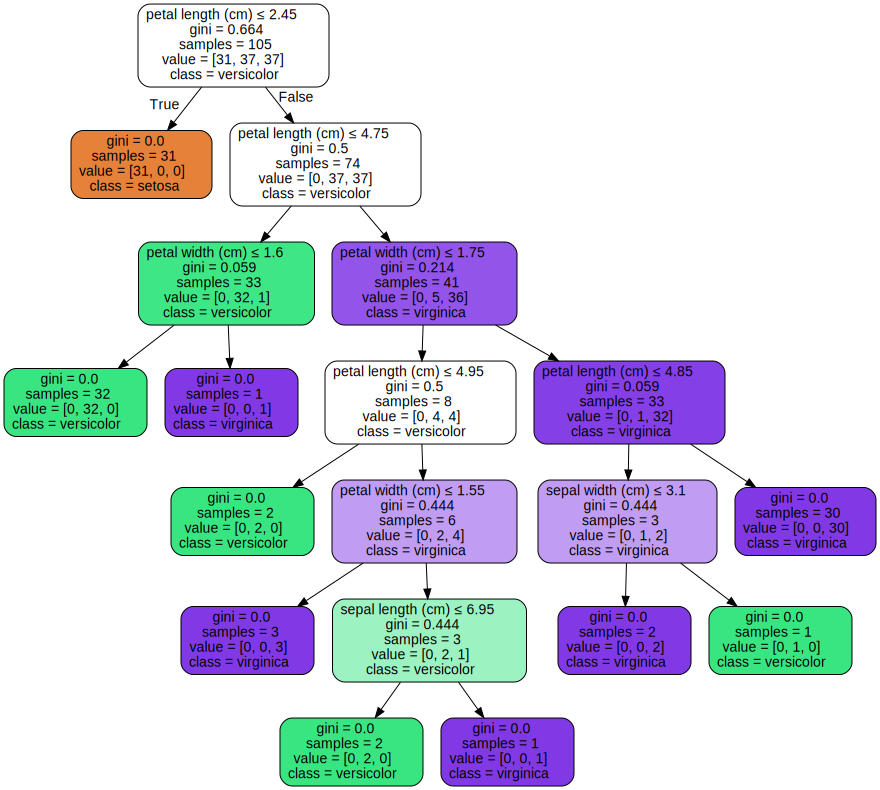

In [10]:
# exportation de la structure de l'arbre dans un fichier .dot
dotFile = open("file1.dot", "w")

# Viusaliseur en ligne
tree.export_graphviz(modelTree, out_file=dotFile,
                    feature_names=features,
                    class_names=classes,
                    filled=True, rounded=True,
                    special_characters=True)
dotFile.close()

# Visualisation
dot_data = tree.export_graphviz(modelTree, out_file=None, 
                        feature_names=features,  
                        class_names=classes,     
                        filled=True, rounded=True,  
                        special_characters=True) 
graph = graphviz.Source(dot_data)
graph

##### Commentaire :

Les noeuds terminaux d'un arbre de décision représentent des classes. Par exemple, si nous voulons obtenir la classe setosa, il faut que petal length soit inférieur ou égale à 2.45



****

# 3. Comparaison de classifiers

## 3.1) Comparaison sans validation croisée

Cet exercice vise à comparer les performances d’un arbre de décision à celles des classifieurs Gaussian Naive Bayes et K-Plus Proches Voisins:

- Découper la base Iris en deux sous-ensembles: un pour l’apprentissage et l’autre pour évaluer les performances en test. Scikit-learn propose des fonctions pour faire cela

- Lancez l’apprentissage d’un arbre de décision sur le sous-ensemble d’apprentissage.
- Lancez l’apprentissage d’un GaussianNB7 et d’un KNeighborsClassifier8 sur le même sous-ensemble d’apprentissage.
- Pour chacun de ces classifieurs, calculez le taux de bonne classification et affichez le résultat, à l’aide de la fonction score.

In [11]:
# dataset iris

# Notons que le modèle de l'arbre de décision a déjà été entrainé

modelNB = GaussianNB()
modelKNN = KNeighborsClassifier(n_neighbors=3)

In [12]:
# Entraînement (apprentissage) des 2 modèles

modelNB = modelNB.fit(X_train, y_train)
modelKNN = modelKNN.fit(X_train, y_train)

In [13]:
# Score

score_summary = []

scoreTree=modelTree.score(X_test, y_test)
scoreNB=modelNB.score(X_test, y_test)
scoreKNN=modelKNN.score(X_test, y_test)

score_summary.append(dict(model="Decision tree",accuracy=scoreTree))
score_summary.append(dict(model="Naives Bayes",accuracy=scoreNB))
score_summary.append(dict(model="K-Neighbors",accuracy=scoreKNN))

In [14]:
df_sum = pd.DataFrame(score_summary)

In [15]:
df_sum

,model,accuracy
0,Decision tree,1.000000
1,Naives Bayes,0.977778
2,K-Neighbors,1.000000


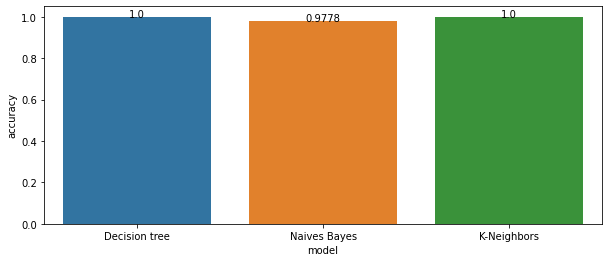

In [16]:
figure = plt.figure(figsize=(10,4))
ax = sn.barplot(y='accuracy', x='model', data=df_sum)
# j'ajoute les valeurs
for index, row in df_sum.iterrows():
    ax.text(row.name,row.accuracy, round(row.accuracy,4), color='black', ha="center")

plt.show()

##### commentaire :

Après comparaison, on conclut que le meilleur score (1.0) peut s'obtenire grâce à Decision tree, KNC suivit de GaussianNB. Enfin nous noterons aussi que le score faible d'un arbre peut s'expliquer par le fait que ce dernier a sur-appris, ce qui nous emmenerai dans la suite à chercher un hyper paramètre à l'aide de la validation croisée dans le soucis de manipuler un indicateur optimalde performance.



****

## 3.2) Comparaison avec validation croisée

Pour obtenir un indicateur de performance plus fiable, vous allez recommencer en utilisant une validation croisée:

- Lancez une procédure de validation croisée à 5 folds pour calculer un taux de bonne classification moyen et un écart-type correspondant. Scikit-learn propose des fonctions pour faire cela

- Pour chaque classifieur, affichez le résultat sous la forme:
    Accuracy: mean (+/- std)
    où mean et std sont à remplacer par les valeurs obtenues

In [17]:
def cvComparaison(Model, X, y, kfolds):
    scoreCV = cross_val_score(Model,X,y,cv=kfolds)
    mean = np.mean(scoreCV)
    std = np.std(scoreCV)
    return mean, std

In [18]:
def printResult(model, m,s):
    print(model+" Accuracy: "+str(m)+" (+/- "+str(s)+")")

In [19]:
# Decision tree with CV

TreeMean, TreeStd = cvComparaison(tree.DecisionTreeClassifier(), X, y, 5)

In [20]:
# Gaussian NB with CV

NbMean, NbStd = cvComparaison(GaussianNB(), X, y, 5)

In [21]:
# KNN with CV

KnnMean, KnnStd = cvComparaison(KNeighborsClassifier(), X, y, 5)

In [22]:
printResult("Tree -> ",TreeMean,TreeStd)
printResult("NB -> ",NbMean,NbStd)
printResult("KNN -> ",KnnMean,KnnStd)

Tree ->  Accuracy: 0.9666666666666668 (+/- 0.036514837167011066)
NB ->  Accuracy: 0.9533333333333334 (+/- 0.02666666666666666)
KNN ->  Accuracy: 0.9733333333333334 (+/- 0.02494438257849294)


#### Commentaire :

Avec la validation croisée, on peut bien afficrmer que, on obtient des score raisonnable sur nos 3 classifieurs.
Par exemple, il s'agit bient du KNC qui se distingue des autres.



****

## 3.3) Reproduisez cette comparaison sur plusieurs bases de données jouets proposées par Scikit-Learn, analysez les résultats et donnez vos conclusions : ici, nous allons le faire sur 2 bases de données : 

**3.3.1) Dabord, on s'intéresse à 178 (50 dans chacune des classes) observations qui représentent les résultats d'une analyse chimique de vins cultivés dans la même région en Italie par trois cultivateurs différents. Il y a treize mesures différentes prises pour différents constituants trouvés dans les trois types de vin.**

In [23]:
from sklearn.datasets import load_wine

In [24]:
wines = load_wine()

X_wines = wines.data
y_wines = wines.target

print('dimension de X :', X_wines.shape)
print("")
print("les différentes valeurs de nos features : \n",X_wines)
print("")
print('on veut prédire un cultivateur (0, 1 ou 2) par vin : ',y_wines)

dimension de X : (178, 13)

les différentes valeurs de nos features : 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

on veut prédire un cultivateur (0, 1 ou 2) par vin :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [25]:
# Split data
X_wines_train, X_wines_test, y_wines_train, y_wines_test = train_test_split(X_wines, y_wines, test_size=0.30, random_state=42)

# création du modèle
modelTreeWines = tree.DecisionTreeClassifier()

# entraînement du modèle
modelTreeWines.fit(X_wines_train,y_wines_train)

# get entêtes
classes_wines = wines.target_names
features_wines = wines.feature_names

In [26]:
print('les cultivateurs (classes) : \n\n',classes_wines)
print("")
print('les features (caractéristiques  chimiques des vins) : \n\n',features_wines)

les cultivateurs (classes) : 

 ['class_0' 'class_1' 'class_2']

les features (caractéristiques  chimiques des vins) : 

 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Exécutez cette cellule afin de visualiser le graphe

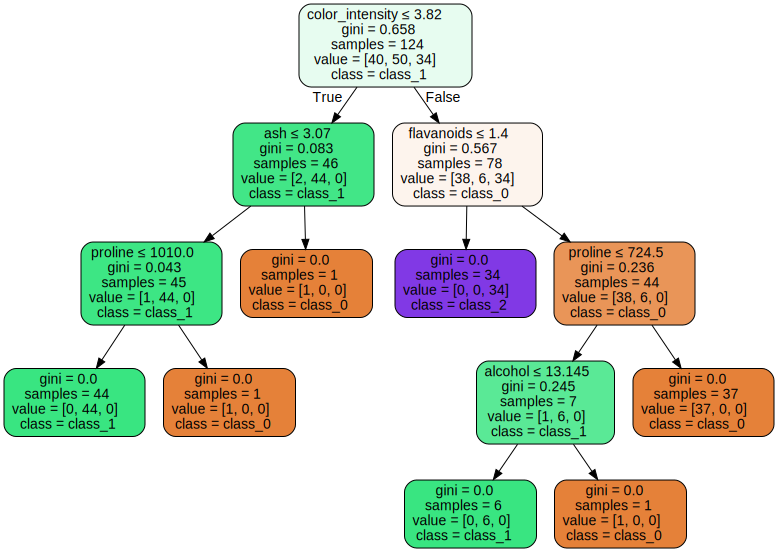

In [27]:
# exportation de la structure de l'arbre dans un fichier .dot
dotFile_wines = open("file2.dot", "w")

# Viusaliseur en ligne
tree.export_graphviz(modelTreeWines, out_file=dotFile_wines,
                    feature_names=features_wines,
                    class_names=classes_wines,
                    filled=True, rounded=True,
                    special_characters=True)
dotFile_wines.close()

# Visualisation
dot_wine = tree.export_graphviz(modelTreeWines, out_file=None, 
                        feature_names=features_wines,  
                        class_names=classes_wines,     
                        filled=True, rounded=True,  
                        special_characters=True) 
graph = graphviz.Source(dot_wine)
graph

In [28]:
# Decision tree with CV

TreeMean_wines, TreeStd_wines = cvComparaison(tree.DecisionTreeClassifier(), X_wines, y_wines, 5)

# Gaussian NB with CV

NbMean_wines, NbStd_wines = cvComparaison(GaussianNB(), X_wines, y_wines, 5)

# KNN with CV

KnnMean_wines, KnnStd_wines = cvComparaison(KNeighborsClassifier(), X_wines, y_wines, 5)

printResult("Tree ->",TreeMean_wines,TreeStd_wines)
printResult("NB ->",NbMean_wines,NbStd_wines)
printResult("KNN ->",KnnMean_wines,KnnStd_wines)

Tree -> Accuracy: 0.8763492063492062 (+/- 0.0627705030601298)
NB -> Accuracy: 0.9663492063492063 (+/- 0.02113317858457236)
KNN -> Accuracy: 0.6912698412698413 (+/- 0.04877951071049148)


#### Commentaire :

Avec le dataset sur les vins, on peut constater que GaussianNB est efficace, masi ce pendant, on ne perd pas de vue que tout est question de la manière dont les données sont aléatoirment obtenu au niveau du split. 



****

**3.3.2) Pour finir notre exploration de cet algorithme sur différentes bases de données qu'offre sklearn, on va s'intéresse à présent aux dignostics sur le cancer du sein dans le Wisconsin, l'objectif serait de dire si pour chaque sujet, il s'agit d'un cas malin ou bénigne. Ce jeu de donnés comporte 569 observations, dont 30 features**

In [29]:
from sklearn.datasets import load_breast_cancer

In [30]:
# on charge et on renvoie l'ensemble de données sur le cancer du sein au Wisconsin
cancer = load_breast_cancer()

X_cancer = cancer.data
y_cancer = cancer.target

print('dimension de X :\n', X_cancer.shape)
print("")
print("les différentes valeurs de nos features : \n",X_cancer)
print("")
print('on veut prédire pour chaque sujet une situation (maligne ou Bénigne) : \n',y_cancer)

dimension de X :
 (569, 30)

les différentes valeurs de nos features : 
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

on veut prédire pour chaque sujet une situation (maligne ou Bénigne) : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

In [31]:
# Split data
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.30, random_state=42)

# création du modèle
modelTreeCancer = tree.DecisionTreeClassifier()

# entraînement du modèle
modelTreeCancer.fit(X_cancer_train,y_cancer_train)

# get entêtes
classes_cancer = cancer.target_names
features_cancer = cancer.feature_names

In [32]:
print('les niveau de la maladie (classes) : \n',classes_cancer)
print("")
print('les features (caractéristiques de chaque sujet par rapport à leur situation respective) : \n',features_cancer)

les niveau de la maladie (classes) : 
 ['malignant' 'benign']

les features (caractéristiques de chaque sujet par rapport à leur situation respective) : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Exécutez cette cellule afin de visualiser le graphe

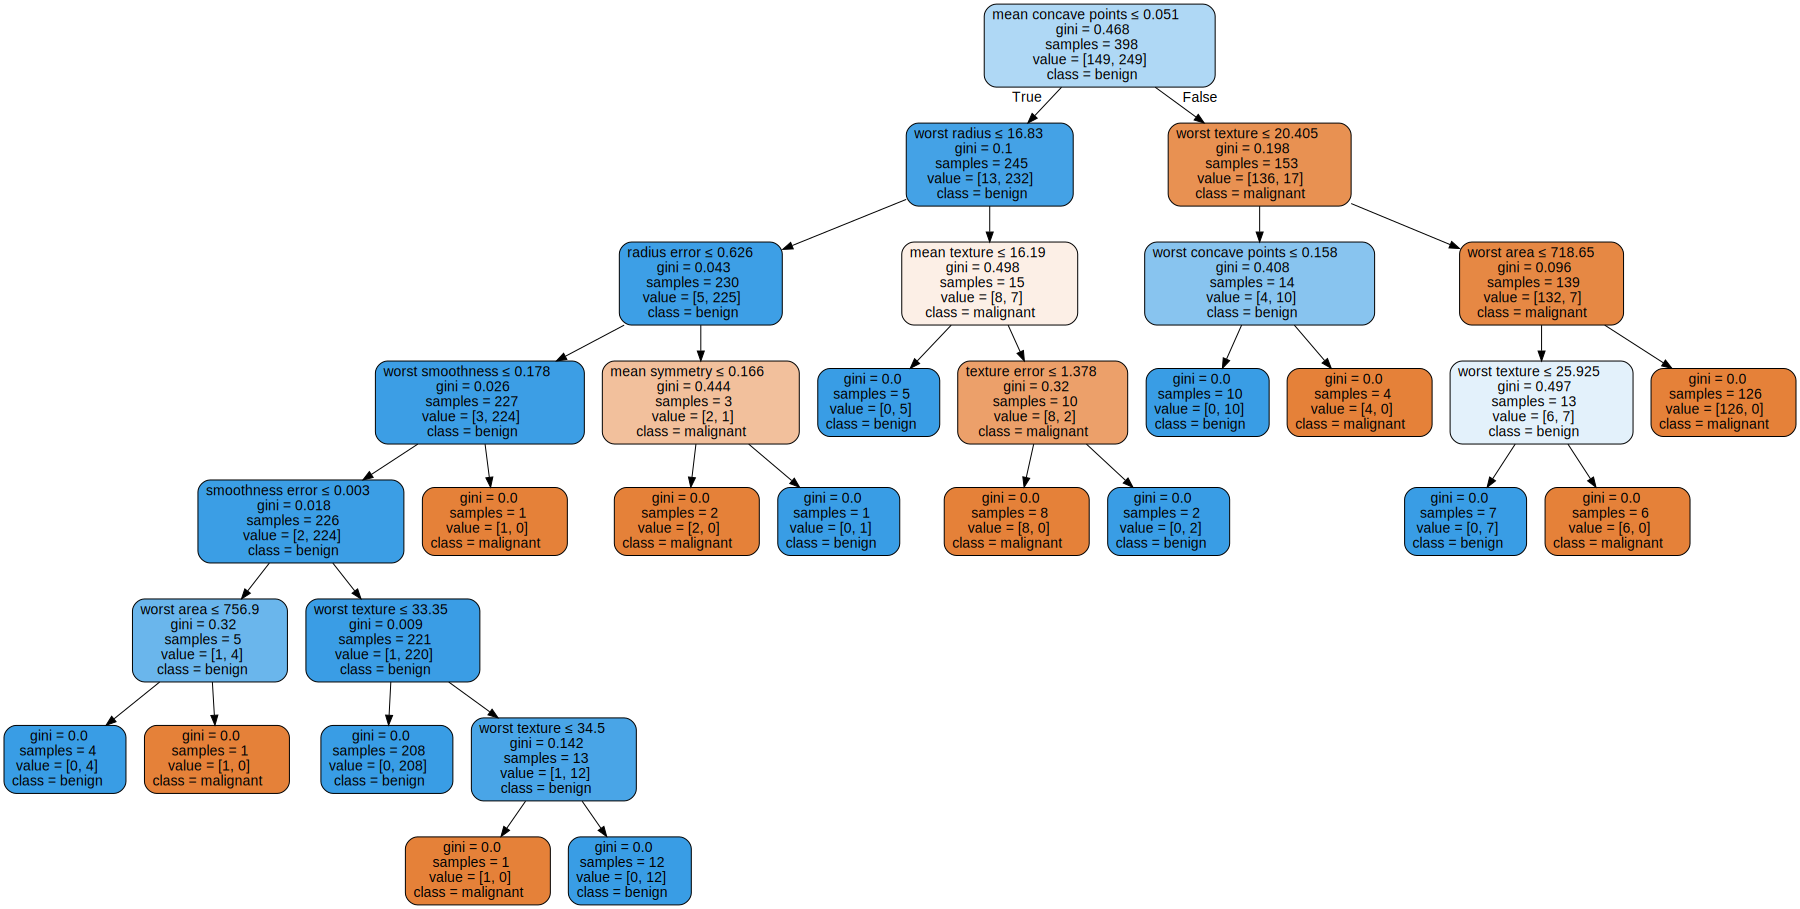

In [33]:
# exportation de la structure de l'arbre dans un fichier .dot
dotFile_cancer = open("file3.dot", "w")

# Viusaliseur en ligne
tree.export_graphviz(modelTreeCancer, out_file=dotFile_cancer,
                    feature_names=features_cancer,
                    class_names=classes_cancer,
                    filled=True, rounded=True,
                    special_characters=True)
dotFile_cancer.close()

# Visualisation
dot_wine = tree.export_graphviz(modelTreeCancer, out_file=None, 
                        feature_names=features_cancer,  
                        class_names=classes_cancer,     
                        filled=True, rounded=True,  
                        special_characters=True) 
graph = graphviz.Source(dot_wine)
graph

In [34]:
# Decision tree with CV

TreeMean_cancer, TreeStd_cancer = cvComparaison(tree.DecisionTreeClassifier(), X_cancer, y_cancer, 5)

# Gaussian NB with CV

NbMean_cancer, NbStd_cancer = cvComparaison(GaussianNB(), X_cancer, y_cancer, 5)

# KNN with CV

KnnMean_cancer, KnnStd_cancer = cvComparaison(KNeighborsClassifier(), X_cancer, y_cancer, 5)

printResult("Tree ->",TreeMean_cancer,TreeStd_cancer)
printResult("NB ->",NbMean_cancer,NbStd_cancer)
printResult("KNN ->",KnnMean_cancer,KnnStd_cancer)

Tree -> Accuracy: 0.9173730787144854 (+/- 0.01981721851462547)
NB -> Accuracy: 0.9385188635305075 (+/- 0.014585994424363306)
KNN -> Accuracy: 0.9279459711224964 (+/- 0.02176276406544814)


#### Commentaire :

On peut remarquer que pour le dataset sur le cancer, là encore GaussianNB se distingue positivement des autres.



****

## 4) Visualiser les frontières de décision

Sur un problème de classification en deux dimensions, on peut facilement visualiser les
frontières de décision d’un arbre de décision et analyser comment elles évoluent en
fonction de certains paramètres d’apprentissage.

- Générer une base de données synthétique en deux dimensions avec la fonction make_moon de Scikit-learn11. Cette base sera composée de 2 classes, 500 instances, et un taux de bruit de 0.2.

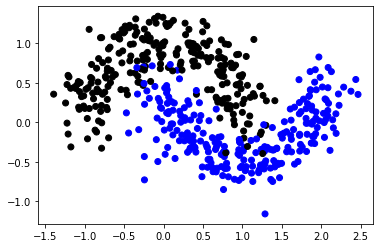

In [35]:
dataX, dataY = make_moons(500, noise = 0.2)
colormap=np.array(['Black','Blue'])
plt.scatter(dataX[:,0], dataX[:,1],color=colormap[dataY])

- Lancez l’apprentissage d’un arbre de décision, d’un GaussianNB et d’un KNeighborsClassifier sur cette base, comme à l’exercice précédent.

In [36]:
modelArbre = tree.DecisionTreeClassifier()
modelNaives = GaussianNB()
modelKNC = KNeighborsClassifier()

In [37]:
X_app, X_dec, y_app, y_dec = train_test_split(dataX, dataY, test_size=0.30, random_state=42)

In [38]:
modelArbre = modelArbre.fit(X_app,y_app)
modelNaives = modelNaives.fit(X_app,y_app)
modelKNC = modelKNC.fit(X_app,y_app)

- Créez une fonction python plot_decision_frontiers qui prend en paramètre un classifieur, sa base d’apprentissage et une figure dans laquelle seront dessinés les points (2D) de la base d’apprentissage et les frontières de décision du classifieur.

Cette fonction procédera en plusieurs étapes:

1. Générer une grille de points 2D: {(i, j)} pour i = $x^{(1)}_{min}...x^{(1)}_{max} et j = x^{(2)}_{min}...x^{(2)}_{max}$ Pour cela, utilisez la fonction **meshgrid** de NumPy.

2. Rassembler les prédictions de l’arbre pour chacun des points de cette grille. Les fonctions **ravel**, **c_** et reshape de NumPy pourront vous être utiles.

3. Afficher les points de la base d’apprentissage avec la fonction **scatter** de Matplotlib.

4. Afficher les frontières de décisions en utilisant la fonction **contourf** de Matplotlib.

In [39]:
def plot_decision_frontiers(Model, X, y, check, fig):
    
    if(check==False):
        txt="tree1-Gini"
    elif(check==True):
        txt="tree2-Entropy"
    else:
        txt=check
        
    # Meshgrid
    
    h = .2
    colors = "bry"
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig.contourf(xx, yy, Z, cmap=plt.cm.Paired)    
    fig.set_title(txt)
    fig.axis('tight')

    for i, color in zip(Model.classes_, colors):
        idx = np.where(y == i)
        fig.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.Paired, edgecolor='black', s=20) 

- Créez une figure contenant 3 sous-figures avec la fonction subplots de Matplotlib.
- Appelez la fonction plot_decision_frontiers pour chacun des trois classifieurs et chacune des 3 sous-figures.

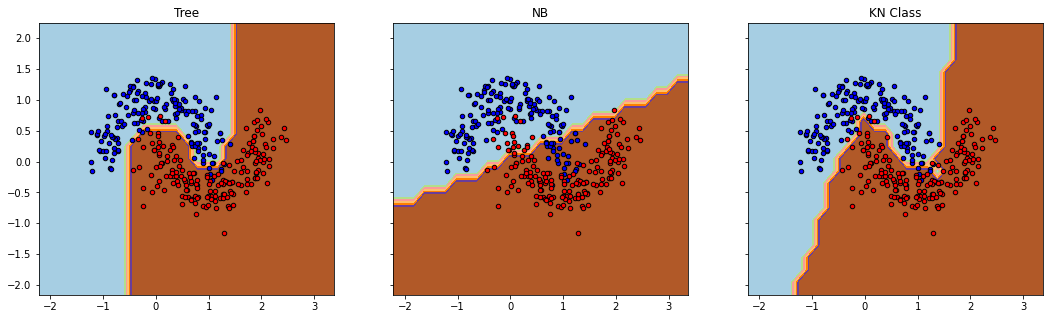

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=True)

plot_decision_frontiers(modelArbre, X_app, y_app, "Tree", ax[0])
plot_decision_frontiers(modelNaives, X_app, y_app, "NB", ax[1])
plot_decision_frontiers(modelKNC, X_app, y_app, "KN Class", ax[2])

#### Commentaire :

Dans cette première visualisation, on remarque qu'avec nos données d'apprentissages, KNC se comporte correctement.



****

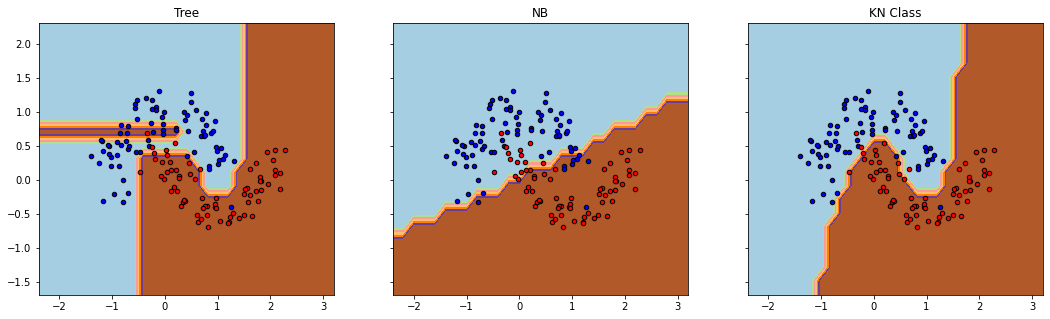

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(18,5), sharex=True, sharey=True)
# dataX, dataY
# X_dec,y_dec
# X_app, y_app
plot_decision_frontiers(modelArbre, X_dec,y_dec, "Tree", ax[0])
plot_decision_frontiers(modelNaives, X_dec,y_dec, "NB", ax[1])
plot_decision_frontiers(modelKNC, X_dec,y_dec, "KN Class", ax[2])

#### Commentaire :

avec des données de tests, on parvient aussi à avoir des résulats satisfaisants, avec un Kppv-C et, un Arbre de Décision, ces derniers classifient donc bien les points. Cependant, alors qu'ua niveau de Decision Tree, l'arbre sur-apprends, GaussianNB classe mal les points.



****

## 5) Étude de paramètres

L’objectif est d’analyser l’influence de quelques paramètres sur les performances d’un arbre de décision. Dans un premier temps, analysez l’effet du critère de partitionnement:

- Générez une nouvelle base avec make_moon, avec 1000 données et un taux de bruits de 0.3.

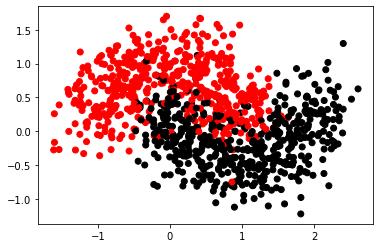

In [42]:
dataX2, dataY2 = make_moons(1000, noise = 0.3)
colormap=np.array(['Red','Black'])
plt.scatter(dataX2[:,0], dataX2[:,1],color=colormap[dataY2])

- Lancez l’apprentissage de deux arbres de décision sur cette base: l’un avec le critère de partitionnement Gini, l’autre avec Entropy.

In [43]:
# En apprentissage : l'entropie est nulle lorsque toutes les observations appartiennent à une classe

modelTree1 = tree.DecisionTreeClassifier(criterion="gini")
modelTree2 = tree.DecisionTreeClassifier(criterion="entropy")

In [44]:
X_app_1, X_dec_2, y_app_1, y_dec_2 = train_test_split(dataX2, dataY2, test_size=0.30, random_state=42)

modelTree1 = modelTree1.fit(X_app_1,y_app_1)

modelTree2 = modelTree2.fit(X_app_1,y_app_1)

- Visualisez les frontières de décision des deux classifieurs ainsi obtenus en utilisant la fonction définie à l’exercice précédent.

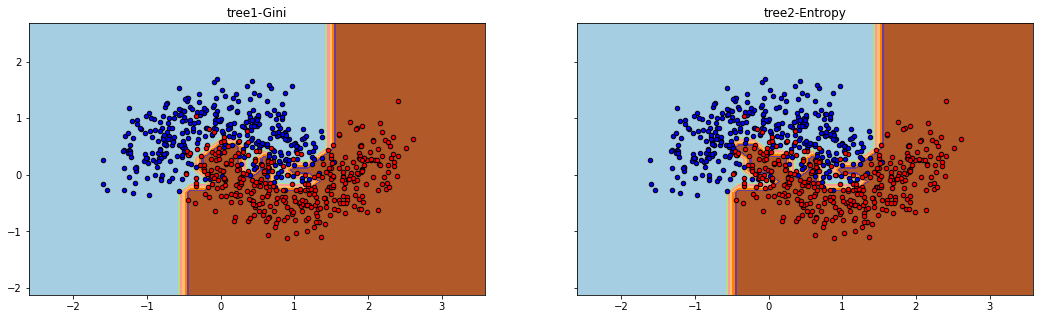

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=True)

plot_decision_frontiers(modelTree1, X_app_1,y_app_1, False, ax[0])
plot_decision_frontiers(modelTree2, X_app_1,y_app_1, True, ax[1])

#### Commentaire :

Quoi que imparfait, alors qu'au moment de l'apprentissage un arbre de décision avec Gini semble bien classer les points, l'entropy paraît moins performant, ainsi, on va privilégier la discrimination des données selon l'impureté de Gini.

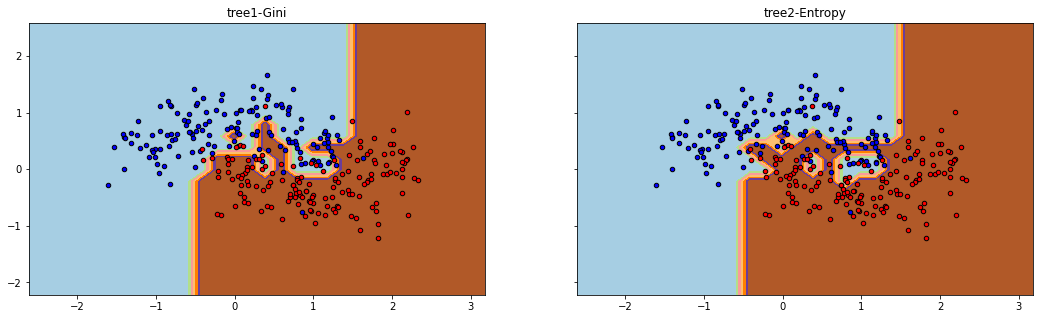

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18,5), sharex=True, sharey=True)

plot_decision_frontiers(modelTree1, X_dec_2,y_dec_2, False, ax[0])
plot_decision_frontiers(modelTree2, X_dec_2,y_dec_2, True, ax[1])

#### Commentaire :

Grosso modo, au moment des tets, on parvient à mieux généraliser avec Gini.



****

- Estimez également les performances de ces deux algorithmes d’apprentissage avec une procédure de validation croisée.

In [47]:
# Decision tree with CV and gini

TreeMean_Gini, TreeStd_Gini = cvComparaison(tree.DecisionTreeClassifier(), dataX2, dataY2, 5)

# Gaussian NB with CV and entropy

TreeMean_Entropy, TreeStd_Entropy = cvComparaison(tree.DecisionTreeClassifier(), dataX2, dataY2, 5)

printResult("Tree.Gini ->",TreeMean_Gini,TreeStd_Gini)
printResult("Tree.Entropy ->",TreeMean_Entropy,TreeStd_Entropy)

Tree.Gini -> Accuracy: 0.8899999999999999 (+/- 0.008366600265340762)
Tree.Entropy -> Accuracy: 0.884 (+/- 0.009695359714832668)


- Analysez les résultats et donnez vos conclusions.

#### Commentaire :

Une fois de plus nous confirmons après application de la croisse validation, que l'on va préférer une classification avec arbre de décision basée sur Gini que sur l'entropie. Par ailleurs, du fait que en moyennes dans les deux cas nous avons un score pas suffisant, nous pousserait à tester un autre classifieur.



****

Dans un deuxième temps, vous allez créer une expérience pour visualiser l’évolution de performances en fonction des valeurs de deux paramètres:

- la profondeur maximum de l’arbre de décision
- le nombre minimum de données par feuille

Pour cela:

- Faites varier les valeurs de chaque paramètre (séparément):

        - Profondeur maximum: de 1 à 30
        - Nombre minimum de données par feuille (en pourcentage): de 1% à 50%
        
- Pour chaque valeur, testez l’apprentissage d’un arbre via une procédure de validation croisée et mémoriser le taux moyen de bonne classification dans un tableau.

- Tracez la courbe de l’évolution du taux moyen de bonne classification en fonction des valeurs de paramètre testées.

- Analysez les résultats et donnez vos conclusions.

In [48]:
X, y = make_moons(10000, noise = 0.3)

In [49]:
profondeur = []
tauxGiniMoyen = []
tauxEntropieMoyen = []

In [50]:
for i in range(1, 30, 1):
    profondeur.append(i)
    tauxGiniMoyen.append(cvComparaison(tree.DecisionTreeClassifier(max_depth=i, criterion="gini"), X, y, 5)[0])
    tauxEntropieMoyen.append(cvComparaison(tree.DecisionTreeClassifier(max_depth=i, criterion="entropy"), X, y, 5)[0])

Text(0, 0.5, 'taux')

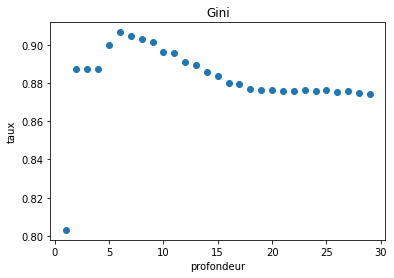

In [51]:
plt.scatter(profondeur, tauxGiniMoyen)
plt.title("Gini")
plt.xlabel("profondeur")
plt.ylabel("taux")

Text(0, 0.5, 'taux')

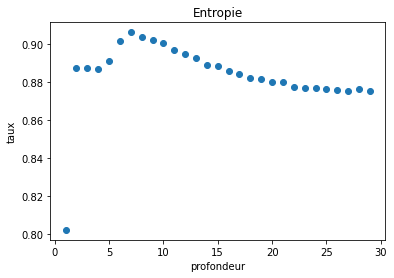

In [52]:
plt.scatter(profondeur, tauxEntropieMoyen)
plt.title("Entropie")
plt.xlabel("profondeur")
plt.ylabel("taux")

#### Commentaire :

Autant un arbre est profond, autant il ets complexe, et donc, Gini présente un critère de performance meilleur que Entropie. Nous l'aurons compris, dans le cas contraire, autant un abre est moins profond, autant l'entrpoie est moins meilleur que Gini.

*****

In [53]:
profondeur = []
tauxGiniMoyen = []
tauxEntropieMoyen = []

In [54]:
for i in range(1, 50, 1):
    profondeur.append(i)
    tauxGiniMoyen.append(cvComparaison(tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf=i), X, y, 5)[0])
    tauxEntropieMoyen.append(cvComparaison(tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i), X, y, 5)[0])

Text(0, 0.5, 'taux')

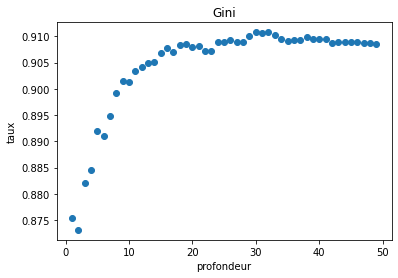

In [55]:
plt.scatter(profondeur, tauxGiniMoyen)
plt.title("Gini")
plt.xlabel("profondeur")
plt.ylabel("taux")

Text(0, 0.5, 'taux')

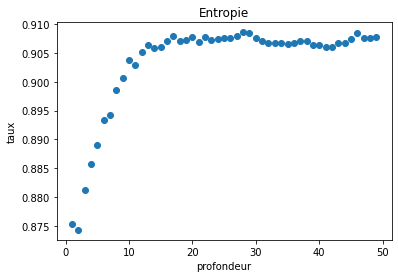

In [56]:
plt.scatter(profondeur, tauxEntropieMoyen)
plt.title("Entropie")
plt.xlabel("profondeur")
plt.ylabel("taux")

#### Commentaire :

Gini est performant pour les arbres avec des feuilles aux nombreuses informations, alors que l'Entropie est préférable lorsqu'il y 'en a moins.